In [3]:
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**numpy** - работа с числа, числови данни <br/>
**pandas** - работа с данни  <br/>
**matplotlib** - работа с визуализации  <br/>

# Data Acquisition
### Събиране на данни

Data science е повече science и по-малко data.


Четем данните от различни източници: <br/>
    - текстови файлове  <br/>
    - Excel  <br/>
    - SQL Бази данни  <br/>

Принципи за събиране и валидиране на данни (Data Consolidation Principles)

#### The Scientific Method Steps

Процесът за събиране на данни винаги започва с въпрос - не с данни, не с хипотеза, а с въпрос. Въпросите може да са няколко, а не само един, може и да не е добре формулиран. <br/>
След това правим рисърч. Разбираме какво се прави, това как да прехвърлим задачата от абстрактна бизнес задача към такава, която може да позволи данните да бъдат анализирани и моделирани. <br/>
След това формулираме хипотеза. Вече знаем, че една хипотеза всъщност са две хипотези, които си противоречат. Тук често създаваме няколко хипотези.
След това вече правим експеримент. Това е моментът в който за първи път получаваме данни. <br/>
Процесът продължава с анализ на резултатите. <br/>
хипотезата ни е или вярна или не. <br/>
Много често продължаваме нататък със същия дейтасет.

В pandas можем да правим или да четем много различни видове data frames (data sets), което означава не просто колекция от данни, а множество от данни. <br/>
**С Shift + Tab се показва документацията.**

In [8]:
pd.DataFrame({"name":["Ivan", "Georgi"], "surname": ["Angelov", "Georgiev"], "age": [27, 34]})

,name,surname,age
0,Ivan,Angelov,27
1,Georgi,Georgiev,34


Данните, които можем да прочетем се наричат структурирани данни.

В други случеи ще ни трябва да използваме изображения, видеа, текстове, музика, човешки глас, птичи данни и др., тогава имаме неструктурирани данни.

Това, което наричаме модел (schema) е самата структура: какви колони има, какво означават тези колони и какво съдържа тази таблица.
Таблиците могат да бъдат във всякакъв формат. най-често ги получаваме в текстов файл (csv, comma separated values).

In [14]:
pd.read_table("accidents.csv", sep = ",")

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [16]:
accidents = pd.read_csv("accidents.csv")

In [23]:
accidents

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [24]:
type(accidents)

pandas.core.frame.DataFrame

In [18]:
accidents.index

RangeIndex(start=0, stop=6, step=1)

In [19]:
accidents.columns

Index(['Miles from Home', '% of Accidents'], dtype='object')

In [21]:
accidents['Miles from Home']

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: Miles from Home, dtype: object

In [25]:
type(accidents['Miles from Home'])

pandas.core.series.Series

Колоната и таблицата имат различна визуализация, защото са от различен тип.

In [26]:
type(accidents[['Miles from Home']])

pandas.core.frame.DataFrame

Колоните могат да се преименуват:

In [33]:
accidents.columns = ["miles_from_home", "pct_of_accidents"]

In [34]:
accidents

,miles_from_home,pct_of_accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [29]:
accidents.miles_from_home

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: miles_from_home, dtype: object

In [31]:
accidents.shape

(6, 2)

shape казва колко реда и колко колони съдържа таблицата.

In [35]:
accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
pct_of_accidents,6.0,16.666667,8.733079,6.0,10.25,17.0,21.5,29.0


In [37]:
accidents.dtypes

miles_from_home     object
pct_of_accidents     int64
dtype: object

Object може да означава object наистина, но може да означава и string.

Можем да сменяме indexa:

In [39]:
accidents.reset_index()    

,index,miles_from_home,pct_of_accidents
0,0,less than 1,23
1,1,1 to 5,29
2,2,6 to 10,17
3,3,11 to 15,8
4,4,16 to 20,6
5,5,over 20,17


С reset_index() отива като нова колона.

In [40]:
accidents.index = [7, 17, 20, 4, 2, -1]

In [43]:
accidents

,miles_from_home,pct_of_accidents
7,less than 1,23
17,1 to 5,29
20,6 to 10,17
4,11 to 15,8
2,16 to 20,6
-1,over 20,17


Като извикаме отново reste_index():

In [45]:
accidents.reset_index(inplace = True)

In [46]:
accidents

,index,miles_from_home,pct_of_accidents
0,7,less than 1,23
1,17,1 to 5,29
2,20,6 to 10,17
3,4,11 to 15,8
4,2,16 to 20,6
5,-1,over 20,17


In [49]:
accidents_new_index = accidents.reset_index()

In [50]:
accidents

,index,miles_from_home,pct_of_accidents
0,7,less than 1,23
1,17,1 to 5,29
2,20,6 to 10,17
3,4,11 to 15,8
4,2,16 to 20,6
5,-1,over 20,17


In [56]:
accidents = accidents.reset_index(drop = True)

Изтриваме таблица, за да освободим място или просто защото вече не ни трябва:

In [54]:
del accidents_new_index

In [57]:
accidents_new_index

NameError: name 'accidents_new_index' is not defined

Pandas може да чете от url-и:

In [60]:
credit_risk_data = pd.read_csv("https://github.com/plotly/datasets/raw/master/data.csv")

In [61]:
credit_risk_data.shape

(150000, 11)

In [63]:
credit_risk_data.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [67]:
credit_risk_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [70]:
credit_risk_data["SeriousDlqin2yrs"] = credit_risk_data["SeriousDlqin2yrs"].astype("category")

In [71]:
credit_risk_data.dtypes

SeriousDlqin2yrs                        category
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
dtype: object

Ако имаме един csv файл във zip - pandas ще го ънзипне сам, но ако имаме повече от едини няма да може.

Можем да запазваме промените в данните и да създадем ново csv:

In [74]:
accidents.to_csv("modified.csv")

In [75]:
!pip install openpyxl

Четем от excel файл:

In [84]:
green_trip_data = pd.read_excel("green_tripdata_2015-09.xls")

Гледаме колко редове и колони има в таблицата:

In [87]:
green_trip_data.shape

(65535, 21)

От какъп тип са данните в колоните:

In [89]:
green_trip_data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

Какви колони има:

In [82]:
green_trip_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

Да покажем хистограмата:

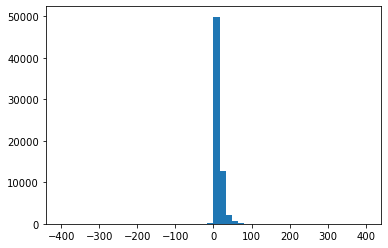

In [94]:
plt.hist(green_trip_data.Fare_amount, bins = 50)
plt.show()

Махаме отрицателните амаунти:

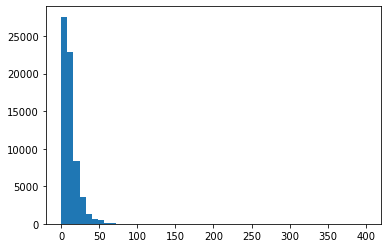

In [96]:
plt.hist(green_trip_data.Fare_amount[green_trip_data.Fare_amount > 0], bins = 50)
plt.show()

In [97]:
green_trip_data.Fare_amount[green_trip_data.Fare_amount > 0].skew()

7.01369599688203